In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
df = pd.read_csv('cardio_train.csv', delimiter=';')

In [6]:
# Step 1: Inspect the first few rows
print("Step 1: First 5 rows of the dataset:")
print(df.head())

Step 1: First 5 rows of the dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [7]:
# Step 2: Check data types and missing values
print("\nStep 2: Information about the dataset (data types and non-null counts):")
df.info()


Step 2: Information about the dataset (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# Step 3: Basic Descriptive Statistics
print("\nStep 3: Descriptive Statistics for all numerical columns:")
print(df.describe())


Step 3: Descriptive Statistics for all numerical columns:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.08

In [9]:
# Step 4: Check for Duplicates
n_duplicates = df.duplicated().sum()
print(f"\nStep 4: Total Duplicated Rows: {n_duplicates}")

if n_duplicates > 0:
    # Remove duplicates if found
    df = df.drop_duplicates()
    print("Duplicates removed.")


Step 4: Total Duplicated Rows: 0


In [10]:
# Step 5: Standardize Column Names
# Column names are already clean (lowercase, no spaces)
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("\nStep 5: Column names after standardization (if any change was needed):")
print(df.columns.tolist())


Step 5: Column names after standardization (if any change was needed):
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [11]:
# Step 6: Value Counts for Categorical Columns
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
print("\nStep 6: Value Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts())


Step 6: Value Counts for Categorical Columns:

Value Counts for 'gender':
gender
1    45530
2    24470
Name: count, dtype: int64

Value Counts for 'cholesterol':
cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

Value Counts for 'gluc':
gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

Value Counts for 'smoke':
smoke
0    63831
1     6169
Name: count, dtype: int64

Value Counts for 'alco':
alco
0    66236
1     3764
Name: count, dtype: int64

Value Counts for 'active':
active
1    56261
0    13739
Name: count, dtype: int64

Value Counts for 'cardio':
cardio
0    35021
1    34979
Name: count, dtype: int64


In [12]:
# Step 7: Convert age to years and plot distribution
df['age_years'] = (df['age'] / 365.25).astype(int)

plt.figure(figsize=(7, 5))
sns.histplot(df['age_years'], kde=True, bins=30)
plt.title('Step 7: Age Distribution (in Years)')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.savefig('step_07_age_distribution.png')
plt.close()
print("Step 7: Age distribution plot saved as 'step_07_age_distribution.png'")

Step 7: Age distribution plot saved as 'step_07_age_distribution.png'


In [13]:
# Step 8 & 9 : Plot Distributions for Height, Weight, ap_hi, ap_lo on RAW data
numerical_features = ['height', 'weight', 'ap_hi', 'ap_lo']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Step {8 if i<2 else 9} (Raw): Distribution of {col.title().replace("_", " ")}')

plt.tight_layout()
plt.savefig('steps_08_09_raw_distributions.png')
plt.close()
print("Steps 8 & 9 (Raw): Numerical distributions plot saved as 'steps_08_09_raw_distributions.png'")

Steps 8 & 9 (Raw): Numerical distributions plot saved as 'steps_08_09_raw_distributions.png'


In [14]:
# Step 10: Analyze Target Variable (Raw Data)
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df)
plt.title('Step 10: Raw Distribution of Cardiovascular Disease')
plt.xlabel('Cardio (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.savefig('step_10_cardio_distribution_raw.png')
plt.close()
print("Step 10: Cardio distribution plot saved as 'step_10_cardio_distribution_raw.png'")

Step 10: Cardio distribution plot saved as 'step_10_cardio_distribution_raw.png'


In [15]:
# Step 11: Distribution of Binary/Categorical Features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Step 11: Distribution of {col.title()}")

plt.tight_layout()
plt.savefig('step_11_categorical_distributions.png')
plt.close()
print("Step 11: Categorical distributions plot saved as 'step_11_categorical_distributions.png'")

Step 11: Categorical distributions plot saved as 'step_11_categorical_distributions.png'


In [16]:
# Step 12 & 13: Outlier Detection and Handling/Cleaning
outlier_cols = ['height', 'weight', 'ap_hi', 'ap_lo']

# Step 12: Visualize Outliers (Box Plots on Raw Data)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(outlier_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Step 12: Box Plot of {col.title()} (Raw Data)')

plt.tight_layout()
plt.savefig('step_12_outlier_boxplots_raw.png')
plt.close()
print("Step 12: Outlier visualization (raw) saved as 'step_12_outlier_boxplots_raw.png'")


df_cleaned = df[df['ap_lo'] < df['ap_hi']].copy()

df_cleaned = df_cleaned[(df_cleaned['ap_hi'] >= 80) & (df_cleaned['ap_hi'] <= 250)]

df_cleaned = df_cleaned[(df_cleaned['ap_lo'] >= 40) & (df_cleaned['ap_lo'] <= 140)]


print(f"\nStep 13: Original rows: {len(df)}. Rows after BP cleaning: {len(df_cleaned)}")

Step 12: Outlier visualization (raw) saved as 'step_12_outlier_boxplots_raw.png'

Step 13: Original rows: 70000. Rows after BP cleaning: 68660


In [17]:
# Step 14: Correlation Heatmap
# Use the cleaned data and relevant features (including age_years created in Step 7)
correlation_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
corr_matrix = df_cleaned[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Step 14: Correlation Matrix Heatmap (Cleaned Data)')
plt.savefig('step_14_correlation_heatmap.png')
plt.close()
print("Step 14: Correlation heatmap saved as 'step_14_correlation_heatmap.png'")

Step 14: Correlation heatmap saved as 'step_14_correlation_heatmap.png'


In [18]:
# Step 15: Relationship between Age and Cardio (Risk vs. Age)
age_risk = df_cleaned.groupby('age_years')['cardio'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age_years', y='cardio', data=age_risk, marker='o')
plt.title('Step 15: Cardiovascular Disease Risk vs. Age (Cleaned Data)')
plt.xlabel('Age in Years')
plt.ylabel('Proportion with Cardiovascular Disease (Cardio=1)')
plt.grid(True, axis='y', alpha=0.5)
plt.savefig('step_15_cardio_risk_vs_age.png')
plt.close()
print("Step 15: Cardio risk vs. age plot saved as 'step_15_cardio_risk_vs_age.png'")

Step 15: Cardio risk vs. age plot saved as 'step_15_cardio_risk_vs_age.png'


In [19]:
# Step 16: Cardio Disease Risk by Categorical Features (Cholesterol & Glucose)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Risk by Cholesterol
chol_risk = df_cleaned.groupby('cholesterol')['cardio'].mean().reset_index()
sns.barplot(x='cholesterol', y='cardio', data=chol_risk, ax=axes[0])
axes[0].set_title('Step 16: Cardio Risk by Cholesterol Level')
axes[0].set_xlabel('Cholesterol Level (1: Normal, 3: High)')
axes[0].set_ylabel('Proportion with Cardio Disease')
axes[0].set_ylim(0, 1)

# Risk by Glucose
gluc_risk = df_cleaned.groupby('gluc')['cardio'].mean().reset_index()
sns.barplot(x='gluc', y='cardio', data=gluc_risk, ax=axes[1])
axes[1].set_title('Step 16: Cardio Risk by Glucose Level')
axes[1].set_xlabel('Glucose Level (1: Normal, 3: High)')
axes[1].set_ylabel('Proportion with Cardio Disease')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('step_16_categorical_risk_barplots.png')
plt.close()
print("Step 16: Categorical risk bar plots saved as 'step_16_categorical_risk_barplots.png'")

Step 16: Categorical risk bar plots saved as 'step_16_categorical_risk_barplots.png'


In [20]:
# Step 17: BMI Calculation and Analysis
# BMI = weight (kg) / (height (m))^2
df_cleaned['bmi'] = df_cleaned['weight'] / (df_cleaned['height'] / 100)**2

# Plot BMI vs Cardio
plt.figure(figsize=(7, 6))
sns.boxplot(x='cardio', y='bmi', data=df_cleaned)
plt.title('Step 17: BMI vs. Cardiovascular Disease (Cleaned Data)')
plt.xlabel('Cardio (0: No Disease, 1: Disease)')
plt.ylabel('Body Mass Index (BMI)')
plt.savefig('step_17_bmi_vs_cardio_boxplot.png')
plt.close()
print("Step 17: BMI vs. Cardio boxplot saved as 'step_17_bmi_vs_cardio_boxplot.png'")

Step 17: BMI vs. Cardio boxplot saved as 'step_17_bmi_vs_cardio_boxplot.png'


In [21]:
# Step 18: Blood Pressure vs. Cardio (Box Plots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x='cardio', y='ap_hi', data=df_cleaned, ax=axes[0])
axes[0].set_title('Step 18: Systolic BP (ap_hi) vs. Cardio')
axes[0].set_xlabel('Cardio (0: No Disease, 1: Disease)')
axes[0].set_ylabel('Systolic BP (ap_hi)')

sns.boxplot(x='cardio', y='ap_lo', data=df_cleaned, ax=axes[1])
axes[1].set_title('Step 18: Diastolic BP (ap_lo) vs. Cardio')
axes[1].set_xlabel('Cardio (0: No Disease, 1: Disease)')
axes[1].set_ylabel('Diastolic BP (ap_lo)')

plt.tight_layout()
plt.savefig('step_18_bp_vs_cardio_boxplots.png')
plt.close()
print("Step 18: Blood Pressure vs. Cardio box plots saved as 'step_18_bp_vs_cardio_boxplots.png'")

Step 18: Blood Pressure vs. Cardio box plots saved as 'step_18_bp_vs_cardio_boxplots.png'


In [22]:

# Step 19: Blood Pressure Scatter Plot
plt.figure(figsize=(10, 8))
# Sample 10% of the data for a clearer plot
df_sample = df_cleaned.sample(frac=0.1, random_state=42)
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df_sample, alpha=0.6, palette='Set1', s=20)
plt.title('Step 19: Systolic vs. Diastolic BP, Colored by Cardio (Sampled Data)')
plt.xlabel('Systolic BP (ap_hi)')
plt.ylabel('Diastolic BP (ap_lo)')
plt.legend(title='Cardio')
plt.savefig('step_19_bp_scatter_by_cardio.png')
plt.close()
print("Step 19: Blood Pressure scatter plot saved as 'step_19_bp_scatter_by_cardio.png'")

Step 19: Blood Pressure scatter plot saved as 'step_19_bp_scatter_by_cardio.png'


In [23]:
# Step 20: Smoking/Alcohol and Cardio (Combined Effect)
# Calculate the mean of 'cardio' for each combination of 'smoke' and 'alco'
combined_risk_pivot = df_cleaned.pivot_table(index='smoke', columns='alco', values='cardio', aggfunc='mean')

plt.figure(figsize=(7, 6))
sns.heatmap(combined_risk_pivot, annot=True, fmt=".3f", cmap='YlOrRd', linewidths=.5)
plt.title('Step 20: Cardio Risk by Smoking and Alcohol Consumption')
plt.xlabel('Alcohol (0: No, 1: Yes)')
plt.ylabel('Smoke (0: No, 1: Yes)')
plt.savefig('step_20_smoke_alco_combined_risk_heatmap.png')
plt.close()
print("Step 20: Combined lifestyle risk heatmap saved as 'step_20_smoke_alco_combined_risk_heatmap.png'")

Step 20: Combined lifestyle risk heatmap saved as 'step_20_smoke_alco_combined_risk_heatmap.png'


In [24]:
# --- Setup: Reconstruct the Cleaned DataFrame from initial EDA steps (7, 13, 17) ---
df = pd.read_csv('cardio_train.csv', delimiter=';')
df['age_years'] = (df['age'] / 365.25).astype(int)

# BP Cleaning: Filter illogical and extreme blood pressure values
df_cleaned = df[df['ap_lo'] < df['ap_hi']].copy()
df_cleaned = df_cleaned[(df_cleaned['ap_hi'] >= 80) & (df_cleaned['ap_hi'] <= 250)]
df_cleaned = df_cleaned[(df_cleaned['ap_lo'] >= 40) & (df_cleaned['ap_lo'] <= 140)]

# BMI Calculation
df_cleaned['bmi'] = df_cleaned['weight'] / (df_cleaned['height'] / 100)**2

# Reset index after cleaning
df_cleaned = df_cleaned.reset_index(drop=True)

In [25]:
# --- Step 21: Final Cleaning Check (IQR Outlier Removal) ---
# Filter remaining outliers in height, weight, and BMI using the IQR method (1.5 * IQR rule).
print("\n--- Step 21: Final Cleaning Check (IQR Outlier Removal) ---")
numerical_features_to_check = ['height', 'weight', 'bmi']
for col in numerical_features_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out remaining outliers
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    print(f"Removed outliers for {col}. Current rows: {len(df_cleaned)}")


--- Step 21: Final Cleaning Check (IQR Outlier Removal) ---
Removed outliers for height. Current rows: 68155
Removed outliers for weight. Current rows: 66470
Removed outliers for bmi. Current rows: 65230


In [26]:
# --- Step 22: Encoding Binary Feature `gender` ---
# Convert gender (1=Female, 2=Male) to standard 0/1 encoding (0=Female, 1=Male).
print("\n--- Step 22: Encoding Binary Feature 'gender' ---")
df_cleaned['gender_encoded'] = df_cleaned['gender'].apply(lambda x: 1 if x == 2 else 0)
df_cleaned = df_cleaned.drop(columns=['gender'])
print("'gender' converted to 'gender_encoded' (0=Female, 1=Male).")


--- Step 22: Encoding Binary Feature 'gender' ---
'gender' converted to 'gender_encoded' (0=Female, 1=Male).


In [27]:
# --- Step 23: Define Feature Sets and Drop Redundant Columns ---
print("\n--- Step 23: Define Feature Sets and Drop Redundant Columns ---")
numerical_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
# Drop the original age in days and the unnecessary ID column
df_cleaned = df_cleaned.drop(columns=['id', 'age'])
print("Redundant columns ('id', 'age') dropped.")


--- Step 23: Define Feature Sets and Drop Redundant Columns ---
Redundant columns ('id', 'age') dropped.


In [28]:
# --- Step 24: Scaling Numerical Features ---
# Apply StandardScaler to normalize numerical features.
print("\n--- Step 24: Scaling Numerical Features ---")
scaler = StandardScaler()

# Fit and transform the numerical features
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])
print("Numerical features scaled using StandardScaler.")


--- Step 24: Scaling Numerical Features ---
Numerical features scaled using StandardScaler.


In [29]:
# --- Step 25: Final DataFrame Assembly (Verification and Save) ---
print("\n--- Step 25: Final Processed DataFrame (Ready for Model Training) ---")
print(df_cleaned.head())

# Output the final processed data to CSV
df_cleaned.to_csv('cardio_processed_final.csv', index=False, sep=';')
print("\nFinal processed DataFrame saved as 'cardio_processed_final.csv'.")


--- Step 25: Final Processed DataFrame (Ready for Model Training) ---
     height    weight     ap_hi     ap_lo  cholesterol  gluc  smoke  alco  \
0  0.469933 -0.879883 -0.988446 -0.115179            1     1      0     0   
1 -1.129308  1.044323  0.842758  0.961388            3     1      0     0   
2  0.070123 -0.712561  0.232357 -1.191746            3     1      0     0   
3  0.603203  0.793340  1.453159  2.037955            1     1      0     0   
4 -1.129308 -1.381850 -1.598847 -2.268314            1     1      0     0   

   active  cardio  age_years       bmi  gender_encoded  
0       1       0  -0.407563 -1.148244               1  
1       1       1   0.330976  1.915268               0  
2       0       1  -0.259855 -0.784069               0  
3       1       1  -0.702979  0.445697               1  
4       0       0  -0.850687 -0.901458               0  

Final processed DataFrame saved as 'cardio_processed_final.csv'.


In [30]:
df = pd.read_csv('cardio_processed_final.csv')
df

,height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio;age_years;bmi;gender_encoded
0,0.46993259125721304;-0.8798831721394234;-0.988...
1,-1.1293076011349006;1.0443231744404002;0.84275...
2,0.07012254315918465;-0.7125608811324822;0.2323...
3,0.6032026072898892;0.7933397379299885;1.453159...
4,-1.1293076011349006;-1.381850045160247;-1.5988...
...,...
65225,0.07012254315918465;0.6260174469230473;1.45315...
65226,0.46993259125721304;0.29137286490916486;-0.378...
65227,2.468982831747355;2.717546084509812;3.28436255...
65228,-0.19641748890616761;-0.043271717104717465;0.5...


# Step 26: Data Preparation for Modeling
Define Features (X) and Target (y), then split into Train and Test sets.

In [31]:

from sklearn.model_selection import train_test_split

# Features and Target
X = df_cleaned.drop(columns=['cardio'])
y = df_cleaned['cardio']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")


Training shape: (52184, 12)
Testing shape: (13046, 12)


# Step 27: Train Baseline Models
We will train Logistic Regression, Random Forest, Decision Tree, KNN, and Naive Bayes.

In [32]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

print("Training models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate probabilities for ROC-AUC if supported
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1] 
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = 0 # KNN might not support predict_proba in standard call without setup, or others. 
                # Actually KNN does support it. This is just a safeguard.
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc
    })
    print(f"{name} trained. Accuracy: {acc:.4f}")


Training models...
Logistic Regression trained. Accuracy: 0.7329
Random Forest trained. Accuracy: 0.7117
Decision Tree trained. Accuracy: 0.6326
KNN trained. Accuracy: 0.7008
Naive Bayes trained. Accuracy: 0.7126


# Step 28: Model Comparison
Compare the performance metrics of the trained models.

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.732868   0.759666  0.659471  0.706031  0.796245
1        Random Forest  0.711712   0.711642  0.684841  0.697984  0.765768
2        Decision Tree  0.632608   0.625830  0.608572  0.617081  0.631784
3                  KNN  0.700828   0.698199  0.678065  0.687985  0.748310
4          Naive Bayes  0.712632   0.749280  0.615033  0.675552  0.776080


C:\Users\Ayush Parmar\AppData\Local\Temp\ipykernel_18212\1797289751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


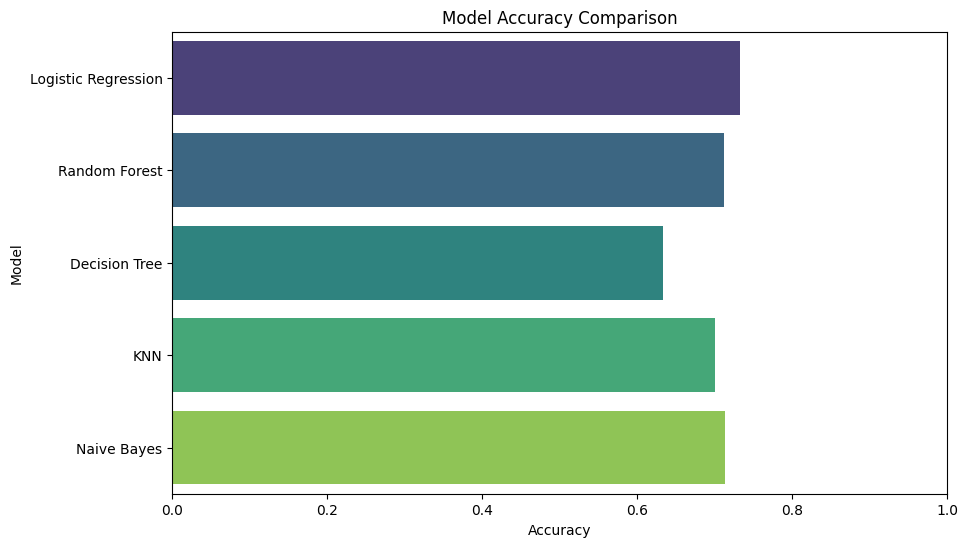

In [33]:

results_df = pd.DataFrame(results)
print(results_df)

# Visualize Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()


# Step 29: Hyperparameter Tuning (Random Forest)
Optimize the Random Forest model using GridSearchCV.

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV
print("Starting Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

# Best Model
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Val Accuracy: {grid_search.best_score_:.4f}")


Starting Hyperparameter Tuning...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


# Step 30: Final Evaluation
Evaluate the tuned Random Forest model on the test set.

In [ ]:
df = pd.read_csv('cardio_processed_final.csv', delimiter=';')

Final Tuned Random Forest Accuracy: 0.7356
Final Tuned Random Forest F1 Score: 0.7068


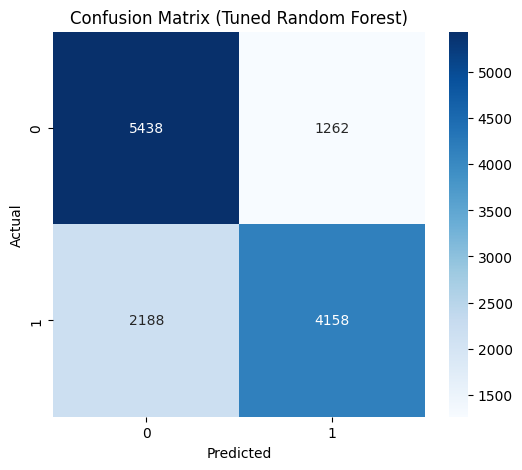

In [ ]:
from sklearn.metrics import confusion_matrix


# Predict on Test Set
y_final_pred = best_rf.predict(X_test)

# Final Metrics
final_acc = accuracy_score(y_test, y_final_pred)
final_f1 = f1_score(y_test, y_final_pred)
print(f"Final Tuned Random Forest Accuracy: {final_acc:.4f}")
print(f"Final Tuned Random Forest F1 Score: {final_f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Step 31: Save Model
Save the final trained model for future use.

In [ ]:

import joblib
joblib.dump(best_rf, 'cardio_model_final.pkl')
print("Model saved to 'cardio_model_final.pkl'")


Model saved to 'cardio_model_final.pkl'


# Step 26: Data Preparation for Modeling
Define Features (X) and Target (y), then split into Train and Test sets.

In [ ]:

from sklearn.model_selection import train_test_split

# Features and Target
X = df_cleaned.drop(columns=['cardio'])
y = df_cleaned['cardio']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")


Training shape: (52184, 12)
Testing shape: (13046, 12)


# Step 27: Train Baseline Models
We will train Logistic Regression, Random Forest, Decision Tree, KNN, and Naive Bayes.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

print("Training models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate probabilities for ROC-AUC if supported
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1] 
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = 0 # KNN might not support predict_proba in standard call without setup, or others. 
                # Actually KNN does support it. This is just a safeguard.
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc
    })
    print(f"{name} trained. Accuracy: {acc:.4f}")


Training models...
Logistic Regression trained. Accuracy: 0.7329
Random Forest trained. Accuracy: 0.7117
Decision Tree trained. Accuracy: 0.6326
KNN trained. Accuracy: 0.7008
Naive Bayes trained. Accuracy: 0.7126


# Step 28: Model Comparison
Compare the performance metrics of the trained models.

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.732868   0.759666  0.659471  0.706031  0.796245
1        Random Forest  0.711712   0.711642  0.684841  0.697984  0.765768
2        Decision Tree  0.632608   0.625830  0.608572  0.617081  0.631784
3                  KNN  0.700828   0.698199  0.678065  0.687985  0.748310
4          Naive Bayes  0.712632   0.749280  0.615033  0.675552  0.776080


C:\Users\Ayush Parmar\AppData\Local\Temp\ipykernel_22384\1797289751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


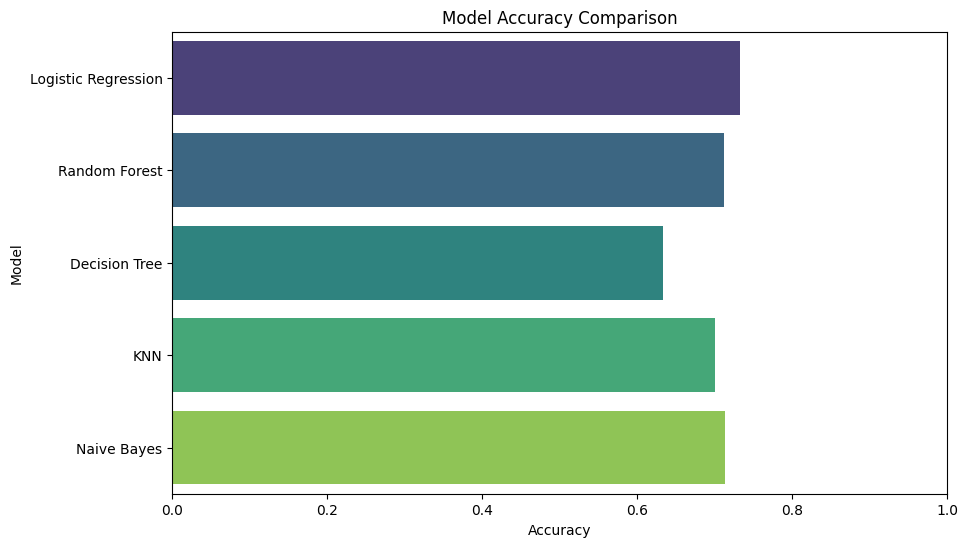

In [ ]:

results_df = pd.DataFrame(results)
print(results_df)

# Visualize Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()


# Step 29: Hyperparameter Tuning (Random Forest)
Optimize the Random Forest model using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV
print("Starting Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

# Best Model
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Val Accuracy: {grid_search.best_score_:.4f}")


NameError: name 'RandomForestClassifier' is not defined

# Step 30: Final Evaluation
Evaluate the tuned Random Forest model on the test set.

In [ ]:

# Predict on Test Set
y_final_pred = best_rf.predict(X_test)

# Final Metrics
final_acc = accuracy_score(y_test, y_final_pred)
final_f1 = f1_score(y_test, y_final_pred)
print(f"Final Tuned Random Forest Accuracy: {final_acc:.4f}")
print(f"Final Tuned Random Forest F1 Score: {final_f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'best_rf' is not defined

# Step 31: Save Model
Save the final trained model for future use.

In [ ]:

import joblib
joblib.dump(best_rf, 'cardio_model_final.pkl')
print("Model saved to 'cardio_model_final.pkl'")


NameError: name 'best_rf' is not defined